In [ ]:
!pip install skforecast
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 11.7 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from itertools import islice
from joblib import dump, load

In [ ]:
from skforecast.preprocessing import series_long_to_dict
from skforecast.preprocessing import exog_long_to_dict
from skforecast.plot import set_dark_theme
from lightgbm import LGBMRegressor
from skforecast.preprocessing import RollingFeatures
from skforecast.recursive import ForecasterRecursiveMultiSeries
from skforecast.model_selection import TimeSeriesFold
from skforecast.model_selection import backtesting_forecaster_multiseries

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Machine Learning - TF/Modelo_SKForecast/df_skforecast.csv')

In [ ]:
tokens_erase = ['0x0.ai', '3DPass', '3space Art', '5ire', 'AI Analysis Token', 'AIT Protocol', 'AVA', 'Abelian', 'Agatech', 'AiMalls', 'Aki Network', 'All.Art Protocol', 'Altlayer', 'Amaterasu Omikami',
                 'Amulet', 'Anchored Coins AEUR', 'ApeBond', 'Arkham', 'ArkiTech', 'Artisse', 'Asterix Labs', 'BADMAD ROBOTS', 'BASE', 'BEFE', 'BLOCX.', 'BLOX', 'BOZO', 'BSCS', 'Banana Gun', 'Beefy', 'Bepro',
                 'Big Time', 'Bitrock', 'Bittensor', 'Bitune', 'Blink Galaxy', 'Blockchain Foundation for Innovation & Collaboration', 'BobaCat', 'Book.io', 'Brickken', 'Byte', 'CZ THE GOAT', 'Captain Tsubasa',
                 'Cashtree Token', 'Catboy', 'Catman', 'Cleo Tech', 'Coconut Chicken', 'Connex', 'Coq Inu', 'Coupon Assets', 'Crypto-AI-Robo.com', 'DEVAI', 'DMAIL Network', 'DeFi', 'DeFinder Capital', 'DeFrogs',
                 'Dust Protocol', 'Dymension', 'Dypius [New]', 'EML Protocol', 'EXGOLAND', 'Earn Network', 'Edelcoin', 'Eggdog', 'Element', 'Epiko', 'Evadore', 'FXDX', 'Farcana', 'Forj (Bondly)', 'Fractal ID',
                 'Fractal Network', 'Fusionist', 'GameGPT', 'GameSwift', 'Gecko Inu', 'GrabCoinClub', 'Gracy', 'HairyPlotterFTX', 'HarryPotterObamaPacMan8Inu', 'Hatom', 'HeFi', 'Hemule', 'Heroes of Mavia', 'Honk',
                 'Hunt Town', 'Hunter Token / Digital Arms', 'IQ Protocol', 'Inspect', 'Islamic Coin', 'Jito', 'KYVE Network', 'Karat', 'Kimbo', 'LUKSO (Old)', 'LandX Finance', 'Law Blocks (AI)', 'Levana Protocol',
                 'Light', 'LootBot', 'MOG Coin', 'Magic Square', 'Magical Blocks', 'MainnetZ', 'Mantle', 'Mantle Staked Ether', 'Maverick Protocol', 'Meme Ai', 'Meme Alliance', 'MetaTrace', 'Minu', 'Miracle Play',
                 'Moby', 'Mochi (New)', 'Moonft', 'Morra', 'Mozaic', 'Mrweb Finance (new)', 'Multibit', 'Myro', 'NAVI Protocol', 'NFPrompt', 'Neon EVM', 'Neurai', 'Neurashi', 'Niza Global', 'Non-Playable Coin',
                 'Nutcoin', 'OORT', 'ORDI', 'ORIGYN', 'OXBT (Ordinals)', 'Oggy Inu (ETH)', 'OmniFlix Network', 'Openfabric AI', 'Operation Phoenix', 'Ozone Chain', 'PAAL AI', 'POLKER', 'PYRIN', 'Pandora', 'Penpie',
                 'PepeFork', 'Pikaboss', 'Ponke', 'Prometheum Prodigy', 'Propbase', 'PymeDAO', 'QuickSwap [Old]', 'ROD.AI', 'Radworks', 'Rain Coin', 'Rake Coin', 'Realvirm', 'Reboot', 'Render', 'RepubliK',
                 'Residual Token', 'SATS', 'SELO+', 'SNOOPYBABE', 'SPECTRE AI', 'SPRINT', 'SPX6900', 'Sable Finance', 'SaitaChain Coin', 'Salad', 'Script Network', 'ShredN', 'Silly Dragon', 'Sleepless AI',
                 'Smilek to the Bank', 'Smog', 'Soil', 'Solama', 'SolarX', 'Solidus Ai Tech', 'StakeWise Staked ETH', 'Statter Network', 'Suiswap', 'SwissCheese', 'TG Casino', 'THE BALKAN DWARF', 'Tectum',
                 'Tethereum', 'The Root Network', 'The Unfettered Ecosystem', 'TokenFi', 'Toshi', 'Tottenham Hotspur Fan Token', 'Trias Token (New)', 'TypeAI', 'UNCX Network', 'UNICE', 'UPCX', 'Ultima', 'UniBot',
                 'Vanar Chain', 'Veloce', 'Vertex Protocol', 'ViciCoin', 'Virtual Versions', 'Vulcan Forged (LAVA)', 'Vulcan Forged (PYR)', 'Wall Street Memes', 'Wecan Group', 'Wen', 'Windoge98', 'Worldcoin',
                 'Wrapped Alvey Chain', 'Xai', 'XcelPay', 'YouSUI', 'ZELIX', 'ZKBase', 'ZKFair', 'ZTX', 'Zeebu', 'ZetaChain', 'analoS', 'dYdX (Native)', 'myDID', 'neversol', 'trac (Ordinals)', 'xMoney', 'zkSwap Finance',
                 '404Aliens', 'Aether Games', 'Aevo', 'Alvara Protocol', 'Andy on SOL', 'Apeiron', 'Apu Apustaja', 'Artyfact', 'Avatly (New)', 'BOOK OF MEME', 'Baby', 'Baby Trump (BSC)', 'Based Shiba Inu', 'BasedAI',
                'BeFi Labs', 'Ben the Dog', 'Bitcoin Wizards', 'BlackCardCoin', 'BlackFort Exchange Network', 'Blendr Network', 'BlockGames', 'Bowled.io', 'Burnedfi', 'Castle of Blackwater', 'ChainSwap', 'Chickencoin',
                'Coinye West', 'Commune AI', 'DOGEMOB', 'DUKO', 'Dechat', 'Destra Network', 'Devve', 'DexCheck AI', 'DexToro', 'Dragonball Z Tribute', 'Edge Matrix Computing', 'Edu3Labs', 'Eesee', 'Entangle', 'Ethena',
                'Everyworld', 'FOMO BULL CLUB', 'GAM3S.GG', 'Gaimin', 'Gary Banking', 'Gigachad', 'HAMI', 'HUND', 'Haedal Staked SUI', 'HashAI', 'HotKeySwap', 'Hypr Network', 'Icon.X World', 'JOOPS', 'Juice Finance',
                'K9 Finance', 'Koala AI', 'Legends of Elysium', 'Lush AI', 'MAGA VP', 'MEME MINT', 'MILLI', 'Make America Based Again', 'Masa', 'Meta Games Coin', 'MetaDOS', 'Milady Wif Hat', 'MindAI',
                'Morpheus Infrastructure Node', 'Moutai', 'Nemesis Downfall', 'NetMind Token', 'Neurahub', 'NeuralAI', "NeverSurrenderOne's", 'Nibiru Chain', 'Node AI', 'Nvidia Inu', 'OX Coin', 'OneFinity', 'Palette',
                'Panda Swap', 'Pikamoon', 'Pixels', 'Planet Mojo', 'Polyhedra Network', 'Popcat (SOL)', 'Pullix', 'QORPO WORLD', 'QnA3.AI', 'Qubic', 'REKT', 'Real Smurf Cat (ETH)', 'Roost Coin', 'SLERF',
                'Scalia Infrastructure', 'Shark Cat', 'Sheboshis', 'Shido [New]', 'Smart Layer Network', 'Solchat', 'SpaceCatch', 'Starknet', 'Super Trump', 'Ta-da', 'Tensor', 'The First Youtube Cat',
                'Titan Trading Platform', 'Uranus (SOL)', 'Vestate', 'Volo Staked SUI', 'VoluMint', "What's Updog", 'Wormhole', 'Wrapped Zeta', 'ZAIBOT', 'Zebec Network', 'Zero1 Labs', 'beoble', 'bitsCrunch',
                'cat in a dogs world', 'crow with knife', 'ether.fi', 'ether.fi Staked ETH', 'ivendPay', 'nubcat', 'zKML', 'Ÿ', 'Cogito Finance', 'CyberConnect', 'DexCheck', 'Green Shiba Inu [New]', 'JetTon Game',
                'LUKSO [Old]', 'MCOIN', 'Nexera', 'OneDex', 'Thetan World', 'Zypto', 'Basenji', 'LightLink', 'ADreward', 'Acorn Protocol', 'BIM', 'Bad Idea AI', 'Bazaars', 'BeNFT Solutions', 'BlueSale Finance',
                'ChainGPT', 'Eldarune', 'Finblox', 'Games for a Living', 'HarryPotterObamaSonic10Inu (ERC-20)', 'KEK', 'KING', 'LitLab Games', 'Milady Meme Coin', 'MongCoin', 'Myria', 'NuriTopia', 'Octokn',
                'Open Campus', 'Papi', 'Pixer Eternity', 'PlayZap', 'Propchain', 'SELF Crypto', 'SPACE ID', 'SmarDex', 'Stella', 'Sui', 'The Dons', 'Turbo', 'WiFi Map', 'Wrapped HBAR', 'EGO', '8Bit Doge', 'All In',
                'Almace Shards', 'Bend DAO', 'COVIR.IO', 'Conflux Network', 'Cook Protocol', 'Dynex', 'ETHERLAND', 'Echelon Prime', 'ElvishMagic', 'Ethbox', 'Experimental Finance', 'Finminity', 'Free Tool Box Coin',
                'IguVerse', 'Lua Token', 'MarketPeak', 'Omlira', 'Orion', 'PAWSWAP', 'Polar', 'Polkally', 'Radio Caca', 'Rogue Coin', 'STEP', 'Shroom.Finance', 'SmartKey', 'Super Zero', 'Thena', 'Treasure', 'WAGMI Games',
                'YEP COIN', 'ZOM' ]

In [ ]:
# Filtrar el DataFrame para eliminar las filas con tokens en la lista
df = df[~df['name'].isin(tokens_erase)]

In [ ]:
df.shape

(174937, 8)

In [ ]:
print(len(df['name'].unique()))

1252


In [ ]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['cmcRank'] = df['cmcRank'].astype('float64')

In [ ]:
duplicates = df.duplicated(subset=['name', 'last_updated'])
df[duplicates]

,name,cmcRank,last_updated,price,volume24h,marketCap,percentChange1h,percentChange24h
19429,Beam,902.0,2023-11-19,0.053032,1146918.50,7.856864e+06,4.829706,39.337868
19431,Beam,911.0,2023-11-26,0.054900,807280.41,8.133565e+06,-0.277876,-4.652842
19433,Beam,531.0,2023-12-03,0.264961,7974913.62,3.925470e+07,3.785892,59.051571
19435,Beam,777.0,2023-12-10,0.121880,1318145.76,1.805684e+07,-0.397158,2.062591
19437,Beam,811.0,2023-12-17,0.102669,1093621.58,1.521061e+07,0.044033,-8.644073
...,...,...,...,...,...,...,...,...
57054,Dypius,1694.0,2024-01-14,0.026075,267015.33,5.727625e+05,0.125612,-0.150570
107539,Mrweb Finance,418.0,2022-08-14,0.004855,103.77,4.853874e+07,-0.420835,-3.144176
107541,Mrweb Finance,411.0,2022-08-21,0.004507,4776.03,4.505519e+07,-0.159459,15.374472
107543,Mrweb Finance,2313.0,2022-08-28,0.000007,14692.56,7.337507e+04,22.612350,152.594492


In [ ]:
df = df.drop_duplicates(subset=['name', 'last_updated'], keep='last')

In [ ]:
df.to_csv('/content/drive/MyDrive/Datasets/Machine Learning - TF/Modelo_SKForecast/df_skforecast.csv', index=False)

In [ ]:
series = df[['name', 'last_updated', 'marketCap']]
exog = df[['name', 'last_updated', 'cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']]

In [ ]:
series.head()

,name,last_updated,marketCap
0,#MetaHash,2019-03-10,1.165837e+07
1,#MetaHash,2019-03-17,2.229997e+07
2,#MetaHash,2019-03-24,3.280277e+07
3,#MetaHash,2019-03-31,3.516707e+07
4,#MetaHash,2019-04-07,2.980784e+07


In [ ]:
exog.head()

,name,last_updated,cmcRank,price,volume24h,percentChange1h,percentChange24h
0,#MetaHash,2019-03-10,238.0,0.032710,7.051283e+05,-0.152596,-0.231822
1,#MetaHash,2019-03-17,155.0,0.060274,3.759828e+06,-0.861802,6.834290
2,#MetaHash,2019-03-24,124.0,0.085527,1.155522e+07,0.081101,5.933620
3,#MetaHash,2019-03-31,123.0,0.088560,2.923483e+06,-0.500436,-8.272890
4,#MetaHash,2019-04-07,150.0,0.072585,2.883072e+06,-0.022449,4.237380


In [ ]:
# Funcion para graficar el tamaño de los intervalos que hay entre fecha y fecha a traves del dataset
def plot_intervals(df):
  df['last_updated'] = pd.to_datetime(df['last_updated'])

  # Extraer fechas únicas y ordenarlas cronológicamente
  unique_dates = sorted(df['last_updated'].unique())

  # Calcular los intervalos entre fechas consecutivas
  intervals = [(unique_dates[i] - unique_dates[i - 1]).days for i in range(1, len(unique_dates))]

  # Crear un DataFrame para visualizar los intervalos
  intervals_df = pd.DataFrame({
      'Date': unique_dates[1:],  # Fecha actual
      'Interval_Days': intervals  # Intervalo en días
  })

  # Graficar los intervalos
  plt.figure(figsize=(12, 6))
  plt.plot(intervals_df['Date'], intervals_df['Interval_Days'], marker='o', linestyle='-', color='b', label='Intervalos')

  # Añadir más divisiones en el eje y
  plt.yticks(range(min(intervals), max(intervals) + 1, 1))  # Incremento de 1 en el eje y para más divisiones

  plt.xlabel('Fecha', fontsize=12)
  plt.ylabel('Intervalo en días', fontsize=12)
  plt.title('Intervalos entre fechas únicas en el dataset', fontsize=14)
  plt.xticks(rotation=45)
  plt.grid(alpha=0.5)
  plt.legend()
  plt.tight_layout()
  plt.show()

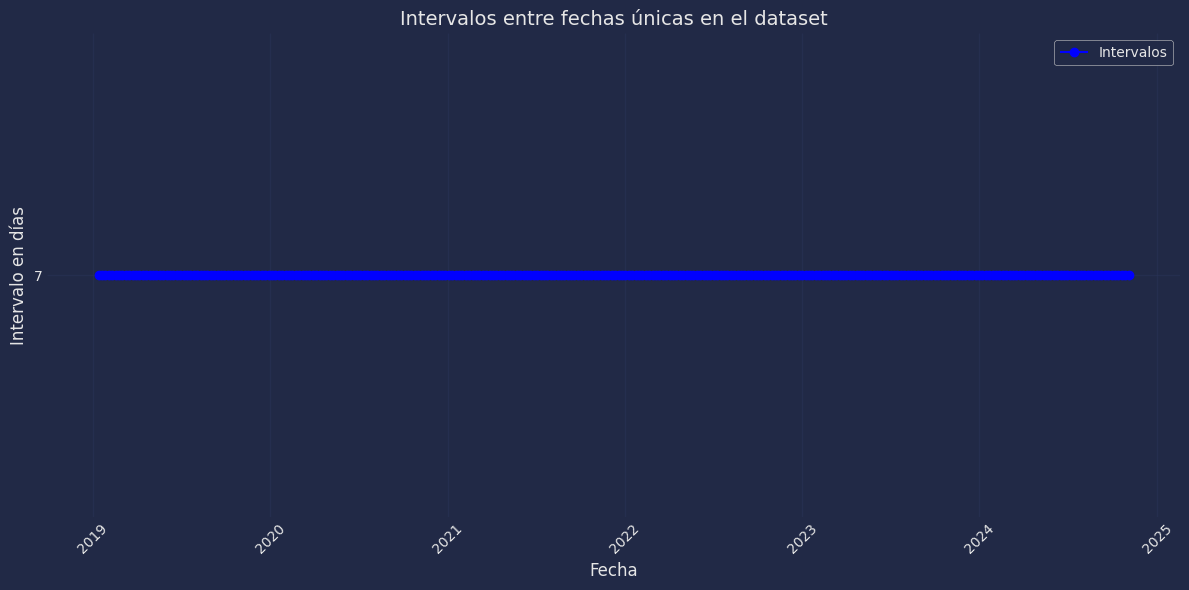

In [ ]:
plot_intervals(df)

In [ ]:
# Transform series and exog to dictionaries
# ==============================================================================
series_dict = series_long_to_dict(
    data = series,
    series_id = 'name',
    index = 'last_updated',
    values = 'marketCap',
    freq = 'W'
)

exog_dict = exog_long_to_dict(
    data = exog,
    series_id = 'name',
    index = 'last_updated',
    freq = 'W'
)

/usr/local/lib/python3.10/dist-packages/skforecast/preprocessing/preprocessing.py:424: MissingValuesWarning: Series '#MetaHash' is incomplete. NaNs have been introduced after setting the frequency. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesWarning)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/preprocessing/preprocessing.py:424: MissingValuesWarning: Series '$LONDON' is incomplete. NaNs have been introduced after setting the frequency. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesWarning)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/preprocessing/preprocessing.py:424: MissingValuesWarning: Series '0x Protocol' is incomplete. NaNs have been introduced after setting the frequency. 
 You can suppress this warning using: warnings.simplefilter('ignore', category=MissingValuesWarning)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecas

In [ ]:
#Obtener las fechas únicas y ordenarlas
fechas_unicas = sorted(df['last_updated'].unique())

# Calcular el índice para dividir 80% (entrenamiento) y 20% (prueba)
indice_corte = int(len(fechas_unicas) * 0.8)
fecha_corte = fechas_unicas[indice_corte]

print(f"Fecha de corte para dividir datos: {fecha_corte}")

Fecha de corte para dividir datos: 2023-09-10 00:00:00


In [ ]:
# Particiones de entrenamiento y test
# ==============================================================================
end_train = '2023-09-10 23:59:00'
series_dict_train = {k: v.loc[: end_train,] for k, v in series_dict.items()}
exog_dict_train   = {k: v.loc[: end_train,] for k, v in exog_dict.items()}
series_dict_test  = {k: v.loc[end_train:,] for k, v in series_dict.items()}
exog_dict_test    = {k: v.loc[end_train:,] for k, v in exog_dict.items()}

In [ ]:
# Obtener la longitud de cada serie en series_dict_train
longitudes_series = {k: len(v) for k, v in series_dict_train.items()}

# Encontrar la longitud máxima
max_length_token = max(longitudes_series, key=longitudes_series.get)

# Imprimir el resultado
print(f"La serie con más datos es '{max_length_token}' con {longitudes_series[max_length_token]} registros.")

La serie con más datos es 'AdEx' con 245 registros.


#/////////////////Validaciones////////////////

In [ ]:
# Imprime la fecha máxima en los datos de entrenamiento
print("Última fecha en entrenamiento:", series_dict_train[list(series_dict_train.keys())[0]].index.max())

# Imprime la fecha máxima en los datos de test (para predicción)
print("Última fecha en prueba:", series_dict_test[list(series_dict_test.keys())[0]].index.max())


Última fecha en entrenamiento: 2023-04-09 00:00:00
Última fecha en prueba: 2024-11-03 00:00:00


In [ ]:
# Identificar tokens que no tienen datos de entrenamiento
tokens_sin_datos = [
    k for k, v in series_dict_train.items() if v.isna().all()
]

# Mostrar los tokens sin datos de entrenamiento
print(len(tokens_sin_datos))
print("Tokens sin datos de entrenamiento:", tokens_sin_datos)

0
Tokens sin datos de entrenamiento: []


In [ ]:
# Identificar tokens que no tienen datos de entrenamiento en exog_dict_train
tokens_sin_datos_exog = [
    k for k, v in exog_dict_train.items() if v.isna().all().all()  # Verificar que todas las columnas tengan NaN
]

# Mostrar los tokens sin datos de entrenamiento en exog
print(len(tokens_sin_datos_exog))
print("Tokens sin datos de entrenamiento en exog:", tokens_sin_datos_exog)

0
Tokens sin datos de entrenamiento en exog: []


In [ ]:
# Obtener los tokens con menos de 14 registros
tokens_less_than_14 = [k for k, v in series_dict_train.items() if len(v) < 26]

# Imprimir los tokens
print(len(tokens_less_than_14))
print(tokens_less_than_14)

0
[]


In [ ]:
# Obtener los tokens con menos de 14 registros
tokens_less_than_14 = [k for k, v in exog_dict_train.items() if len(v) < 26]

# Imprimir los tokens
print(len(tokens_less_than_14))
print(tokens_less_than_14)

0
[]


In [ ]:
# Lista de tokens con series de tamaño 0
tokens_con_size_0 = [token for token, exog in exog_dict_test.items() if len(exog) == 0]

# Imprimir la lista de tokens con tamaño 0
print(len(tokens_con_size_0) )
print(f"Tokens con tamaño 0: {tokens_con_size_0}")

469
Tokens con tamaño 0: ['#MetaHash', '$LONDON', '1-UP Platform', '2local', '3DCoin', '4THPILLAR TECHNOLOGIES', '8X8 PROTOCOL', '999', '9D NFT', 'ACCEL', 'ADA BOY', 'AFEN Blockchain', 'AGAr', 'AMEPAY', 'ANON', 'APIX', 'APR Coin', 'Absolute', 'AceD', 'AceD (old)', 'Actinium', 'AdEx Network', 'Add.xyz', 'Alethea Artificial Liquid Intelligence Token', 'Alpha Finance Lab', 'Alpha Venture DAO', 'Ambire AdEx', 'AnarchistsPrime', 'Anchor Neural World', 'AntiMatter', 'AntiMatter Governance Token', 'Arata', 'Archer DAO Governance Token', 'Arion', 'Arqma', 'Artis Turba', 'Atari Token', 'Atomic Coin', 'BASIC', 'BHPCoin', 'BIKI', 'BLOC.MONEY', 'BOAT', 'BSC Station', 'BSCView', 'BTSE', 'BZEdge', 'BankerDoge', 'BarterTrade', 'Beefy Finance', 'Beefy.Finance', 'Bettex Coin', 'Beyond Finance', 'Beyondfi', 'BiShares', 'BiblePay', 'Bifrost (BNC)', 'Big Digital Shares', 'Billionaire Token', 'Binance Coin', 'Bintex Futures', 'BitGreen', 'BitMoney', 'BitcoiNote', 'Bitcoin Cash ABC', 'Bitcoin Free Cash', 'B

In [ ]:
# Eliminamos los tokens con tamaño 0 del diccionario de testeo, pero no de entrenamiento, ya que sus datos podrian seguir siendo utiles para entrenar el modelo
exog_dict_test = {token: exog for token, exog in exog_dict_test.items() if len(exog) > 0}
series_dict_test = {token: exog for token, exog in series_dict_test.items() if token not in tokens_con_size_0}

In [ ]:
# Lista de tokens con series de tamaño 0
tokens_con_size_0 = [token for token, exog in exog_dict_test.items() if len(exog) == 0]

# Imprimir la lista de tokens con tamaño 0
print(len(tokens_con_size_0) )

0


#/////////////////Validaciones////////////////

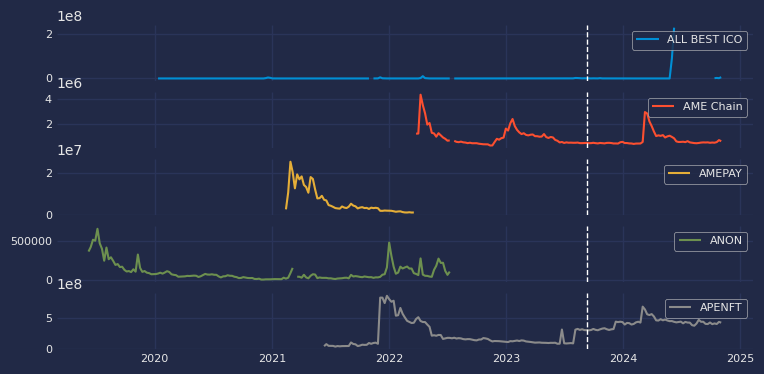

In [ ]:
# Gráfico series
# ==============================================================================
set_dark_theme()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axs = plt.subplots(5, 1, figsize=(8, 4), sharex=True)
for i, (key, s) in enumerate(islice(series_dict.items(), 20, 25)):
    axs[i].plot(s, label=s.name, color=colors[i])
    axs[i].legend(loc='upper right', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

In [ ]:
# Descripción de cada serie
# ==============================================================================
for k in islice(series_dict.keys(), 5):
    print(f"{k}:")
    try:
        print(
            f"\tTrain: len={len(series_dict_train[k])}, {series_dict_train[k].index[0]}"
            f" --- {series_dict_train[k].index[-1]} "
            f" (missing={series_dict_train[k].isnull().sum()})"
        )
    except:
        print(f"\tTrain: len=0")
    try:
        print(
            f"\tTest : len={len(series_dict_test[k])}, {series_dict_test[k].index[0]}"
            f" --- {series_dict_test[k].index[-1]} "
            f" (missing={series_dict_test[k].isnull().sum()})"
        )
    except:
        print(f"\tTest : len=0")

#MetaHash:
	Train: len=214, 2019-03-10 00:00:00 --- 2023-04-09 00:00:00  (missing=3)
	Test : len=0
$LONDON:
	Train: len=53, 2021-08-22 00:00:00 --- 2022-08-21 00:00:00  (missing=1)
	Test : len=0
0x Protocol:
	Train: len=26, 2023-03-19 00:00:00 --- 2023-09-10 00:00:00  (missing=3)
	Test : len=60, 2023-09-17 00:00:00 --- 2024-11-03 00:00:00  (missing=0)
1-UP Platform:
	Train: len=66, 2021-12-12 00:00:00 --- 2023-03-12 00:00:00  (missing=1)
	Test : len=0
1MillionNFTs:
	Train: len=123, 2021-05-09 00:00:00 --- 2023-09-10 00:00:00  (missing=1)
	Test : len=42, 2023-09-17 00:00:00 --- 2024-06-30 00:00:00  (missing=0)


In [ ]:
# Variables exógenas de cada serie
# ==============================================================================
for k in islice(series_dict.keys(), 5):
    print(f"{k}:")
    try:
        print(f"\t{exog_dict[k].columns.to_list()}")
    except:
        print(f"\tNo variables exógenas")

#MetaHash:
	['cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']
$LONDON:
	['cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']
0x Protocol:
	['cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']
1-UP Platform:
	['cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']
1MillionNFTs:
	['cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']


#Modelo sin cross validation

In [ ]:
# Fit forecaster
# ==============================================================================
regressor = LGBMRegressor(random_state=123, max_depth=4, n_estimators=150, learning_rate=0.1)
window_features = RollingFeatures(stats=['mean', 'min', 'max', 'std'], window_sizes=20)
forecaster = ForecasterRecursiveMultiSeries(
                regressor          = regressor,
                lags               = 14,|
                window_features    = window_features,
                encoding           = "ordinal",
                dropna_from_series = False
            )

forecaster.fit(series=series_dict_train, exog=exog_dict_train, suppress_warnings=True)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 107426, number of used features: 24
[LightGBM] [Info] Start training from score 1251761989.654565
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
forecaster

============================== 
ForecasterRecursiveMultiSeries 
============================== 
Regressor: LGBMRegressor 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] 
Window features: ['roll_mean_20', 'roll_min_20', 'roll_max_20', 'roll_std_20'] 
Window size: 20 
Series encoding: ordinal 
Series names (levels): 
    #MetaHash, $LONDON, 0x Protocol, 1-UP Platform, 1MillionNFTs, 2crazyNFT, 2local,
    3DCoin, 4THPILLAR TECHNOLOGIES, 8X8 PROTOCOL, 999, 9D NFT, ACA Token, ACCEL,
    ACoconut, ADA BOY, ADAPad, AFEN Blockchain, AGAr, AIPAD, ALL BEST ICO, AME
    Chain, AMEPAY, ANON, APENFT, ..., fyeth.finance, hybrix, inSure, inSure
    DeFi, keyTango, megaBONK, omchain, pulltherug.finance, rASKO,
    reflect.finance, renBTC, saffron.finance, srnArt Gallery, stETH (Lido),
    unFederalReserve, vEmpire DDAO, x42 Protocol, xDai, xHashtag, xHashtag DAO,
    xSigma, xSuter, yieldwatch, Æternity, τBitcoin 
Exogenous included: True 
Exogenous names: 
    cmcRank, price, volume24h, percentChange1h, percentChange24h 
Transformer for series: None 
Transformer for exog: None 
Weight function included: False 
Series weights: None 
Differentiation order: None 
Training range: 
    '#MetaHash': ['2019-03-10', '2023-04-09'], '$LONDON': ['2021-08-22',
    '2022-08-21'], '0x Protocol': ['2023-03-19', '2023-09-10'], '1-UP Platform':
    ['2021-12-12', '2023-03-12'], '1MillionNFTs': ['2021-05-09', '2023-09-10'],
    ..., 'xSigma': ['2021-03-07', '2023-01-15'], 'xSuter': ['2021-05-23',
    '2022-04-17'], 'yieldwatch': ['2021-03-07', '2023-09-10'], 'Æternity':
    ['2022-08-21', '2023-09-10'], 'τBitcoin': ['2021-04-11', '2022-08-14'] 
Training index type: DatetimeIndex 
Training index frequency: W-SUN 
Regressor parameters: 
    {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0,
    'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 4,
    'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0,
    'n_estimators': 150, 'n_jobs': None, 'num_leaves': 31, 'objective': None,
    'random_state': 123, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0,
    'subsample_for_bin': 200000, 'subsample_freq': 0} 
fit_kwargs: {} 
Creation date: 2024-11-19 07:03:41 
Last fit date: 2024-11-19 07:03:48 
Skforecast version: 0.14.0 
Python version: 3.10.12 
Forecaster id: None

In [ ]:
# Predict
# ==============================================================================
predicciones = forecaster.predict(steps=5, exog=exog_dict_test, suppress_warnings=True)

In [ ]:
predicciones

,0x Protocol,1MillionNFTs,2crazyNFT,ACA Token,ACoconut,ADAPad,AIPAD,ALL BEST ICO,AME Chain,APENFT,...,extraDNA,inSure DeFi,renBTC,saffron.finance,srnArt Gallery,unFederalReserve,x42 Protocol,xHashtag,yieldwatch,Æternity
2023-09-17,1.290445e+08,7.115199e+06,8.348807e+06,6.532514e+06,7.089841e+06,7.943323e+06,7.843464e+06,5.481113e+06,6.962801e+06,2.689061e+08,...,7.089841e+06,7.282962e+07,6.036837e+09,-5.835092e+07,-4.828230e+08,-5.884520e+07,-5.884520e+07,-5.925069e+07,-5.790292e+07,-5.759729e+07
2023-09-24,1.289815e+08,7.115199e+06,7.115199e+06,6.532514e+06,7.089841e+06,6.532514e+06,7.001037e+06,6.532514e+06,6.532514e+06,2.579616e+08,...,7.089841e+06,7.150762e+07,3.408424e+09,-5.881944e+07,-4.828230e+08,-5.931373e+07,-5.796596e+07,-5.790292e+07,-5.931373e+07,-5.873104e+07
2023-10-01,1.303292e+08,8.310571e+06,7.780425e+06,7.843464e+06,6.595553e+06,8.310571e+06,5.899073e+06,7.943323e+06,7.943323e+06,2.472753e+08,...,7.089841e+06,7.242414e+07,-1.654777e+10,-5.790292e+07,-4.828230e+08,-5.988413e+07,-5.790292e+07,-5.753567e+07,-5.806582e+07,-5.763553e+07
2023-10-08,1.307978e+08,7.943323e+06,7.943323e+06,6.532514e+06,7.089841e+06,6.595553e+06,6.648185e+06,6.595553e+06,6.532514e+06,2.472500e+08,...,7.089841e+06,6.905557e+07,-1.232258e+10,-5.790292e+07,-4.828230e+08,-5.925069e+07,-5.875640e+07,-5.835092e+07,-5.875640e+07,-5.866800e+07
2023-10-15,1.303292e+08,7.178238e+06,7.943323e+06,7.089841e+06,7.089841e+06,8.248948e+06,7.001037e+06,6.595553e+06,7.026802e+06,2.485089e+08,...,7.089841e+06,5.999869e+07,-1.943493e+10,-5.875640e+07,-4.828230e+08,-5.843297e+07,-5.800278e+07,-5.866800e+07,-5.749743e+07,-5.866800e+07


In [ ]:
# Backtesting
# ==============================================================================
cv = TimeSeriesFold(
        steps              = 14,
        initial_train_size = len(series_dict_train["AdEx"]),
        refit              = False,
     )

metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
    forecaster            = forecaster,
    series                = series_dict,
    exog                  = exog_dict,
    cv                    = cv,
    metric                = "mean_absolute_error",
    add_aggregated_metric = False,
    n_jobs                = "auto",
    verbose               = True,
    show_progress         = True,
    suppress_warnings     = True
)

display(metrics_levels)
display(backtest_predictions)

Information of folds
--------------------
Number of observations used for initial training: 245
Number of observations used for backtesting: 60
    Number of folds: 5
    Number skipped folds: 0 
    Number of steps per fold: 14
    Number of steps to exclude between last observed data (last window) and predictions (gap): 0
    Last fold only includes 4 observations.

Fold: 0
    Training:   2019-01-06 00:00:00 -- 2023-09-10 00:00:00  (n=245)
    Validation: 2023-09-17 00:00:00 -- 2023-12-17 00:00:00  (n=14)
Fold: 1
    Training:   No training in this fold
    Validation: 2023-12-24 00:00:00 -- 2024-03-24 00:00:00  (n=14)
Fold: 2
    Training:   No training in this fold
    Validation: 2024-03-31 00:00:00 -- 2024-06-30 00:00:00  (n=14)
Fold: 3
    Training:   No training in this fold
    Validation: 2024-07-07 00:00:00 -- 2024-10-06 00:00:00  (n=14)
Fold: 4
    Training:   No training in this fold
    Validation: 2024-10-13 00:00:00 -- 2024-11-03 00:00:00  (n=4)

[LightGBM] [Info] Auto

  0%|          | 0/5 [00:00<?, ?it/s]

,levels,mean_absolute_error
0,#MetaHash,NaN
1,$LONDON,NaN
2,0x Protocol,1.185412e+08
3,1-UP Platform,NaN
4,1MillionNFTs,7.013348e+06
...,...,...
1247,xSigma,NaN
1248,xSuter,NaN
1249,yieldwatch,5.880902e+07
1250,Æternity,6.936306e+07


,0x Protocol,1MillionNFTs,2crazyNFT,ACA Token,ACoconut,ADAPad,AIPAD,ALL BEST ICO,AME Chain,APENFT,...,extraDNA,inSure DeFi,renBTC,saffron.finance,srnArt Gallery,unFederalReserve,x42 Protocol,xHashtag,yieldwatch,Æternity
2023-09-17,1.290445e+08,7.115199e+06,8.348807e+06,6.532514e+06,7.089841e+06,7.943323e+06,7.843464e+06,5.481113e+06,6.962801e+06,2.689061e+08,...,7.089841e+06,7.282962e+07,6.036837e+09,-5.835092e+07,NaN,-5.884520e+07,-5.884520e+07,-5.925069e+07,-5.790292e+07,-5.759729e+07
2023-09-24,1.289815e+08,7.115199e+06,7.115199e+06,6.532514e+06,7.089841e+06,6.532514e+06,7.001037e+06,6.532514e+06,6.532514e+06,2.579616e+08,...,7.089841e+06,7.150762e+07,3.408424e+09,-5.881944e+07,NaN,-5.931373e+07,-5.796596e+07,-5.790292e+07,-5.931373e+07,-5.873104e+07
2023-10-01,1.303292e+08,8.310571e+06,7.780425e+06,7.843464e+06,6.595553e+06,8.310571e+06,5.899073e+06,7.943323e+06,7.943323e+06,2.472753e+08,...,7.089841e+06,7.242414e+07,-1.654777e+10,-5.790292e+07,NaN,-5.988413e+07,-5.790292e+07,-5.753567e+07,-5.806582e+07,-5.763553e+07
2023-10-08,1.307978e+08,7.943323e+06,7.943323e+06,6.532514e+06,7.089841e+06,6.595553e+06,6.648185e+06,6.595553e+06,6.532514e+06,2.472500e+08,...,7.089841e+06,6.905557e+07,-1.232258e+10,-5.790292e+07,NaN,-5.925069e+07,-5.875640e+07,-5.835092e+07,-5.875640e+07,-5.866800e+07
2023-10-15,1.303292e+08,7.178238e+06,7.943323e+06,7.089841e+06,7.089841e+06,8.248948e+06,7.001037e+06,6.595553e+06,7.026802e+06,2.485089e+08,...,7.089841e+06,5.999869e+07,-1.943493e+10,-5.875640e+07,NaN,-5.843297e+07,-5.800278e+07,-5.866800e+07,-5.749743e+07,-5.866800e+07
2023-10-22,1.290445e+08,6.532514e+06,7.943323e+06,6.595553e+06,7.943323e+06,7.943323e+06,7.880284e+06,5.432059e+06,7.780425e+06,2.476554e+08,...,7.089841e+06,4.981368e+07,-2.063508e+09,-5.753567e+07,NaN,NaN,-5.790292e+07,NaN,-5.800278e+07,-5.763553e+07
2023-10-29,1.303292e+08,5.899073e+06,7.943323e+06,7.115199e+06,7.089841e+06,5.481113e+06,7.880284e+06,7.880284e+06,7.115199e+06,2.471869e+08,...,7.843464e+06,5.108086e+07,-2.063409e+09,-5.931373e+07,NaN,-5.796596e+07,-5.753567e+07,-5.925069e+07,-5.873104e+07,-5.763553e+07
2023-11-05,1.294500e+08,4.133343e+06,7.943323e+06,7.089841e+06,6.595553e+06,7.943323e+06,4.627631e+06,4.133343e+06,6.532514e+06,2.483708e+08,...,5.962112e+06,5.285892e+07,-3.486039e+07,-5.753567e+07,NaN,-6.036513e+07,-5.884520e+07,-5.988413e+07,-5.790292e+07,-5.881944e+07
2023-11-12,5.600398e+08,8.310571e+06,7.943323e+06,7.026802e+06,6.595553e+06,7.880284e+06,6.367596e+06,7.943323e+06,7.089841e+06,2.471869e+08,...,7.089841e+06,5.061385e+07,-9.221869e+08,-5.796596e+07,NaN,-5.931373e+07,-5.931373e+07,-5.790292e+07,-5.931373e+07,-5.790292e+07
2023-11-19,5.231382e+08,6.595553e+06,7.943323e+06,7.545486e+06,7.943323e+06,7.457089e+06,7.880284e+06,7.413270e+06,5.481113e+06,2.484091e+08,...,7.089841e+06,5.002946e+07,-1.526216e+10,-5.888344e+07,NaN,-6.036513e+07,-5.753567e+07,-5.790292e+07,-5.830075e+07,-5.806582e+07


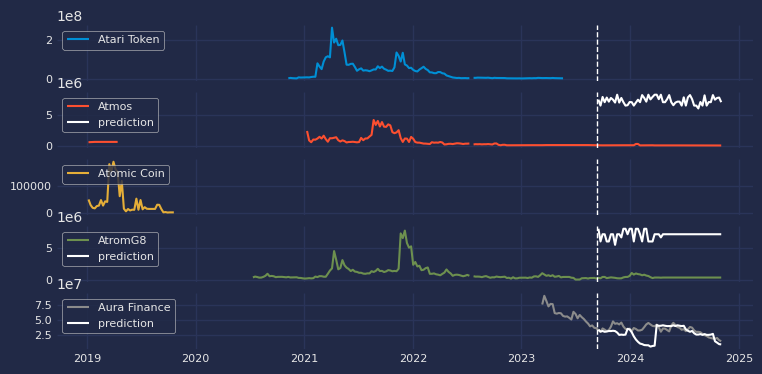

In [ ]:
# Gráfico predicciones backtesting
# ==============================================================================

# Asegúrate de tener suficientes tokens para evitar el error
tokens_a_graficar = list(series_dict.keys())[95:100]  # Selecciona los tokens del 5 al 10

# Gráfico predicciones backtesting
# ==============================================================================

# Asigna un número de subgráficos igual al número de tokens a graficar
fig, axs = plt.subplots(len(tokens_a_graficar), 1, figsize=(8, 4), sharex=True)

# Si solo tienes un subgráfico (cuando solo hay un token), axs es un arreglo unidimensional
if len(tokens_a_graficar) == 1:
    axs = [axs]

# Plotear cada token
for i, token in enumerate(tokens_a_graficar):
    axs[i].plot(series_dict[token], label=series_dict[token].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

    # Intentar graficar las predicciones del backtesting
    try:
        axs[i].plot(backtest_predictions[token], label='prediction', color="white")
    except:
        pass

    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)

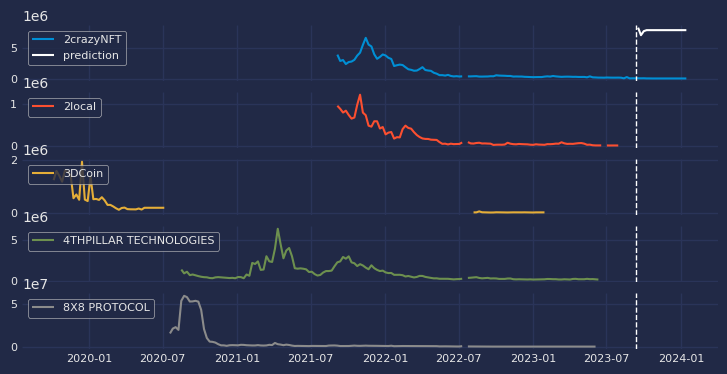

In [ ]:
# Gráfico predicciones backtesting
# ==============================================================================

# Asegúrate de tener suficientes tokens para evitar el error
tokens_a_graficar = list(series_dict.keys())[5:10]  # Selecciona los tokens del 5 al 10

# Gráfico predicciones backtesting
# ==============================================================================

# Asigna un número de subgráficos igual al número de tokens a graficar
fig, axs = plt.subplots(len(tokens_a_graficar), 1, figsize=(8, 4), sharex=True)

# Si solo tienes un subgráfico (cuando solo hay un token), axs es un arreglo unidimensional
if len(tokens_a_graficar) == 1:
    axs = [axs]

# Plotear cada token
for i, token in enumerate(tokens_a_graficar):
    axs[i].plot(series_dict[token], label=series_dict[token].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

    # Intentar graficar las predicciones del backtesting
    try:
        axs[i].plot(backtest_predictions[token], label='prediction', color="white")
    except:
        pass

    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)

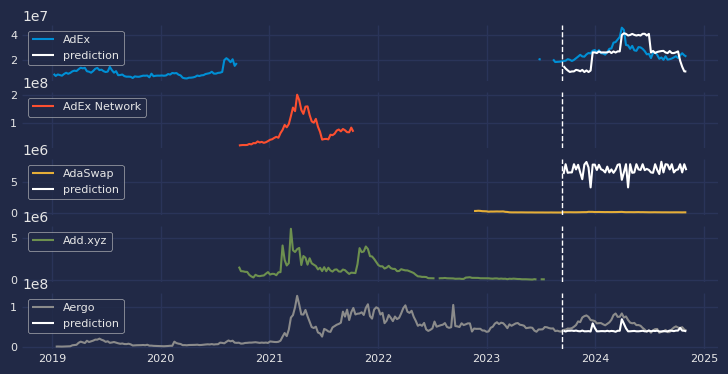

In [ ]:
# Gráfico predicciones backtesting
# ==============================================================================

# Asegúrate de tener suficientes tokens para evitar el error
tokens_a_graficar = list(series_dict.keys())[40:45]  # Selecciona los tokens del 5 al 10

# Gráfico predicciones backtesting
# ==============================================================================

# Asigna un número de subgráficos igual al número de tokens a graficar
fig, axs = plt.subplots(len(tokens_a_graficar), 1, figsize=(8, 4), sharex=True)

# Si solo tienes un subgráfico (cuando solo hay un token), axs es un arreglo unidimensional
if len(tokens_a_graficar) == 1:
    axs = [axs]

# Plotear cada token
for i, token in enumerate(tokens_a_graficar):
    axs[i].plot(series_dict[token], label=series_dict[token].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

    # Intentar graficar las predicciones del backtesting
    try:
        axs[i].plot(backtest_predictions[token], label='prediction', color="white")
    except:
        pass

    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)

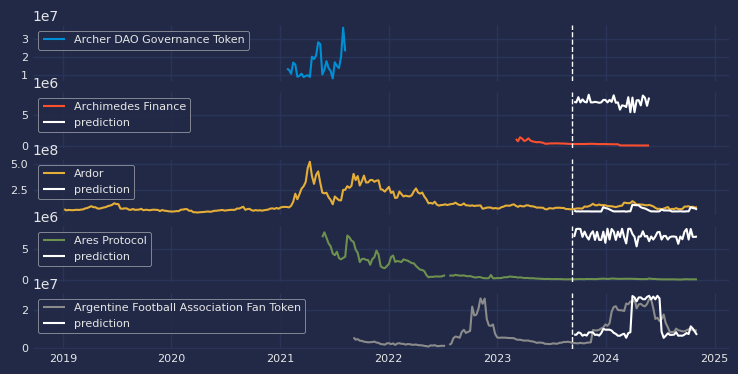

In [ ]:
# Gráfico predicciones backtesting
# ==============================================================================

# Asegúrate de tener suficientes tokens para evitar el error
tokens_a_graficar = list(series_dict.keys())[80:85]  # Selecciona los tokens del 5 al 10

# Gráfico predicciones backtesting
# ==============================================================================

# Asigna un número de subgráficos igual al número de tokens a graficar
fig, axs = plt.subplots(len(tokens_a_graficar), 1, figsize=(8, 4), sharex=True)

# Si solo tienes un subgráfico (cuando solo hay un token), axs es un arreglo unidimensional
if len(tokens_a_graficar) == 1:
    axs = [axs]

# Plotear cada token
for i, token in enumerate(tokens_a_graficar):
    axs[i].plot(series_dict[token], label=series_dict[token].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

    # Intentar graficar las predicciones del backtesting
    try:
        axs[i].plot(backtest_predictions[token], label='prediction', color="white")
    except:
        pass

    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)

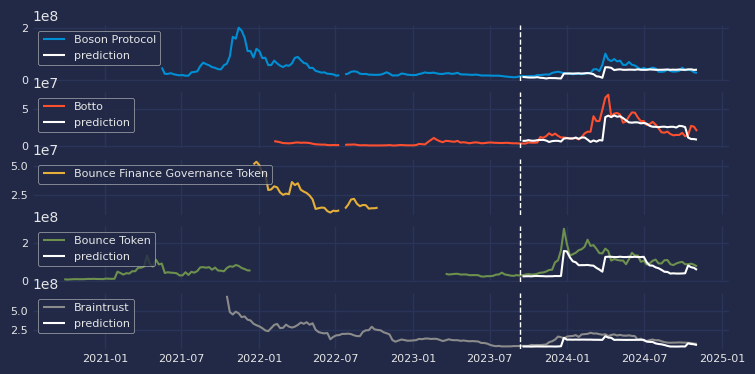

In [ ]:
# Gráfico predicciones backtesting
# ==============================================================================

# Asegúrate de tener suficientes tokens para evitar el error
tokens_a_graficar = list(series_dict.keys())[200:205]  # Selecciona los tokens del 5 al 10

# Gráfico predicciones backtesting
# ==============================================================================

# Asigna un número de subgráficos igual al número de tokens a graficar
fig, axs = plt.subplots(len(tokens_a_graficar), 1, figsize=(8, 4), sharex=True)

# Si solo tienes un subgráfico (cuando solo hay un token), axs es un arreglo unidimensional
if len(tokens_a_graficar) == 1:
    axs = [axs]

# Plotear cada token
for i, token in enumerate(tokens_a_graficar):
    axs[i].plot(series_dict[token], label=series_dict[token].name, color=colors[i])
    axs[i].axvline(pd.to_datetime(end_train), color='white', linestyle='--', linewidth=1)

    # Intentar graficar las predicciones del backtesting
    try:
        axs[i].plot(backtest_predictions[token], label='prediction', color="white")
    except:
        pass

    axs[i].legend(loc='upper left', fontsize=8)
    axs[i].tick_params(axis='both', labelsize=8)

In [ ]:
# Exportar el modelo a un archivo
dump(forecaster, '/content/drive/MyDrive/Datasets/Machine Learning - TF/Modelo_SKForecast/skforecaster_model.joblib')

['/content/drive/MyDrive/Datasets/Machine Learning - TF/Modelo_SKForecast/skforecaster_model.joblib']

In [ ]:
df_prof = pd.read_csv('/content/drive/MyDrive/Datasets/Machine Learning - TF/Modelo_SKForecast/df_skforecast.csv')

In [ ]:
df_prof['last_updated'] = pd.to_datetime(df_prof['last_updated'])

In [ ]:
def predict_xd(name, steps_p, df, f):
  df_pred = df[df['name'] == name]
  df_pred = df_pred.sort_values(by='last_updated')

  required_records = 20
  df_pred = df_pred.iloc[-required_records:]

  series = df_pred[['name', 'last_updated', 'marketCap']]
  exog = df_pred[['name', 'last_updated', 'cmcRank', 'price', 'volume24h', 'percentChange1h', 'percentChange24h']]

  exog_dict = exog_long_to_dict(
    data = exog,
    series_id = 'name',
    index = 'last_updated',
    freq = 'W'
  )

  # Ajustar las fechas de predicción
  last_date = df_pred['last_updated'].max()  # Última fecha del dataframe
  future_dates = pd.date_range(
      start=last_date + pd.Timedelta(days=1),  # Día siguiente a la última fecha
      periods=steps_p,
      freq='W'
  )

  predicciones = f.predict(steps=steps_p, exog=exog_dict, suppress_warnings=True)
  predicciones.index = future_dates

  # Filtrar las predicciones solo para el token seleccionado
  if name in predicciones.columns:
      predicciones = predicciones[[name]]
  else:
      raise ValueError(f"No se encontraron predicciones para el token: {name}")

  return predicciones

In [ ]:
fig = predict_xd(name='Braintrust', steps_p=5, df=df_prof, f=forecaster)
fig

,Braintrust
2024-11-10,-4.773375e+08
2024-11-17,-4.912401e+08
2024-11-24,-4.912401e+08
2024-12-01,-4.912401e+08
2024-12-08,-4.912401e+08
